## Full Tensorflow Example

Import Library

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Understand basic of tensor

In [4]:
zero_dim_tensor = tf.constant(20)
print(zero_dim_tensor)

tf.Tensor(20, shape=(), dtype=int32)


In [5]:
one_dim_tensor = tf.constant([12,20,53,60,11,56])
print(one_dim_tensor)

tf.Tensor([12 20 53 60 11 56], shape=(6,), dtype=int32)


In [6]:
two_dim_tensor  = tf.constant([
    [3,6,7,5],
    [9,2,3,4],
    [5,6,7,8],
    [0,8,11,12]])

print(two_dim_tensor)

tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 5  6  7  8]
 [ 0  8 11 12]], shape=(4, 4), dtype=int32)


### Tensorflow Word
- **Constants** are tensors whose values do not change during the execution of the computational graph. They are created using the tf.constant() 
- **Variables** are tensors whose value can be changed during the execution of the computational graph and they are created using the tf.Variable()  the case of neural networks, weights, and biases can be defined as variables
- **Placeholder** These were used in the first version of Tensorflow as empty containers that do not have specific values. They are just used to reverse a spot for data to be used in the future.

Loading the keras dataset for testing

In [10]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


Showing / Preview the Image

In [11]:
def show_images (train_images,class_names,train_labels,nb_samples = 12,nb_row = 4):
    plt.figure(figsize=(12,12))
    
    for i in range(nb_samples):
        plt.subplot(nb_row,nb_row,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i],cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    
    plt.show()

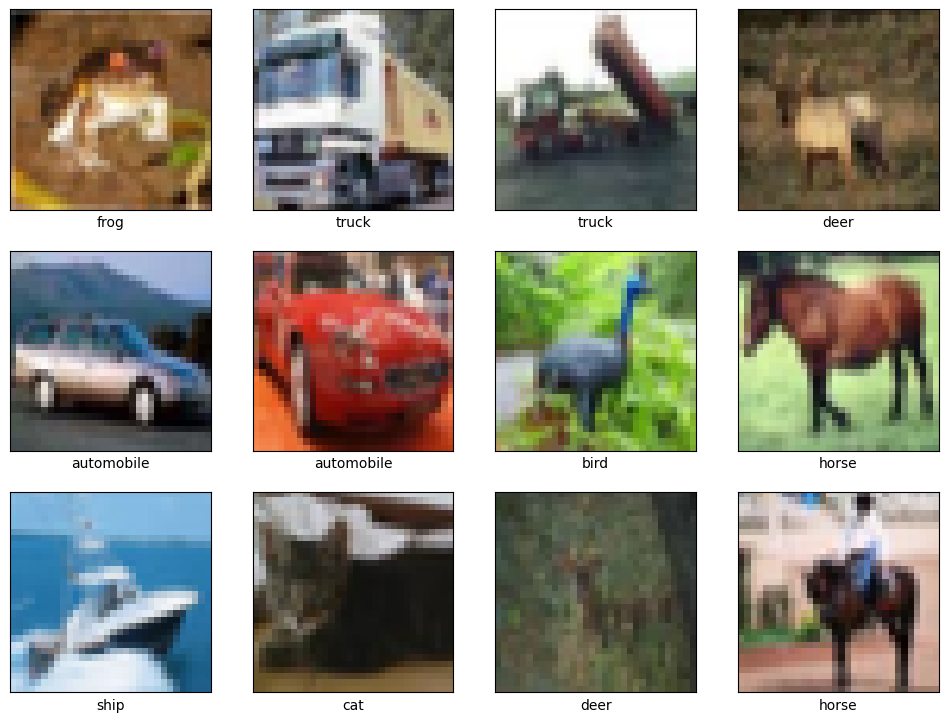

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

Normalize the pixel value to make the data in the same range (0,1)

In [15]:
max_pixel_value = 255

train_images  = train_images / max_pixel_value
test_images  = test_images / max_pixel_value

Convert the label from the categorical format to the numerical format to be easier to proceed in the neural network.

In [17]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels,len(class_names))
test_labels = to_categorical(test_labels,len(class_names))

In [18]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(50000, 10))

### Defining the Model
Import the Layer types from Keras and defining the architecture variable. 

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

INPUT_SHAPE = (32,32,3)
FILTER_1_SIZE = 32
FILTER_2_SIZE = 64
FILTER_SHAPE = (3,3)
POOL_SHAPE = (2,2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

Construct the Model using the sequential model

In [20]:
model = Sequential()
# First Convolution Layer
model.add(Conv2D(FILTER_1_SIZE,FILTER_SHAPE,activation='relu',input_shape=INPUT_SHAPE))
# First Max Pooling Layer
model.add(MaxPooling2D(POOL_SHAPE))
# Second Convolution Layer
model.add(Conv2D(FILTER_2_SIZE,FILTER_SHAPE,activation='relu'))
# Second Max Pooling
model.add(MaxPooling2D(POOL_SHAPE))
# Add Flatten Layer to come to the Fully-Connected NN
model.add(Flatten())
## Add Fully Connected Layer
model.add(Dense(FULLY_CONNECT_NUM,activation='relu'))
## Add Final Fully Connected Layer as the same number of class
model.add(Dense(NUM_CLASSES,activation='softmax'))

d:\tin\basic-image\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Display the model summary

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training
Before training with fit function, we will import the matric to approve our model accuracy, using the measurement of Precision and Recall.
Also for the neural network, we need to define the Batch Size and Epoch.

In [23]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE =  32
EPOCHS = 30

METRICS = metrics = ['accuracy',Precision(name="precision"),Recall(name='recall')]


Compile the model

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

Train the model

In [27]:
training_history = model.fit(train_images,train_labels,
                        epochs=EPOCHS, batch_size= BATCH_SIZE,
                        validation_data=(test_images,test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4811 - loss: 1.4490 - precision: 0.7141 - recall: 0.2526 - val_accuracy: 0.5765 - val_loss: 1.2045 - val_precision: 0.7319 - val_recall: 0.4231
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6152 - loss: 1.0904 - precision: 0.7600 - recall: 0.4655 - val_accuracy: 0.6339 - val_loss: 1.0495 - val_precision: 0.7611 - val_recall: 0.4924
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6599 - loss: 0.9678 - precision: 0.7811 - recall: 0.5390 - val_accuracy: 0.6589 - val_loss: 0.9771 - val_precision: 0.7721 - val_recall: 0.5417
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6923 - loss: 0.8826 - precision: 0.7982 - recall: 0.5870 - val_accuracy: 0.6399 - val_loss: 1.0514 - val_precision: 0.7269 - val_recall: 0.5536
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7152 - loss: 0.8160 - precision: 0.8104 - recall: 0.6224 - val_accuracy: 0.6830 - va

### Model Evaluation
Plotting the Performance Curve to evaluate the model

In [35]:
import numpy as np
def show_performance_curve(training_result,metric,metric_label):
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_idx = np.argwhere(np.isclose(train_perf,validation_perf,atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]

    plt.plot(train_perf,label=metric_label)
    plt.plot(validation_perf,label='val_'+str(metric))
    plt.axvline(x=intersection_idx,color='r',linestyle='--',label='Intersection')

    plt.annotate(f'Optimal Value : {intersection_value:.4f}',
                xy=(intersection_idx,intersection_value),
                xycoords='data',
                fontsize=10,
                color='green')
    
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')


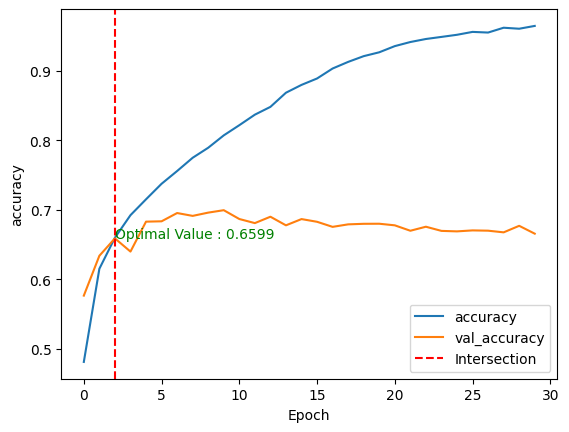

In [36]:
show_performance_curve(training_history,'accuracy','accuracy')

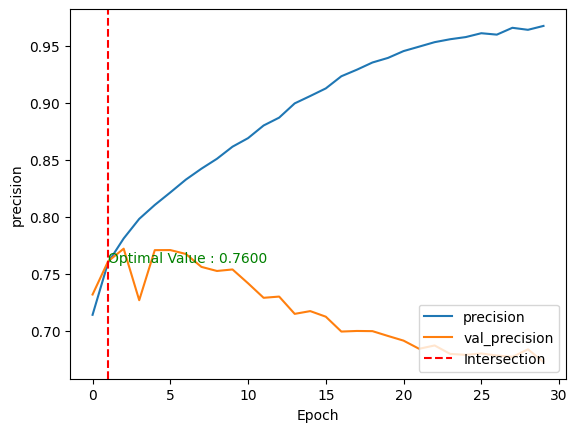

In [37]:
show_performance_curve(training_history, 'precision', 'precision')

Create the Confusion Matrix which represent that how much the class correct and wrong.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


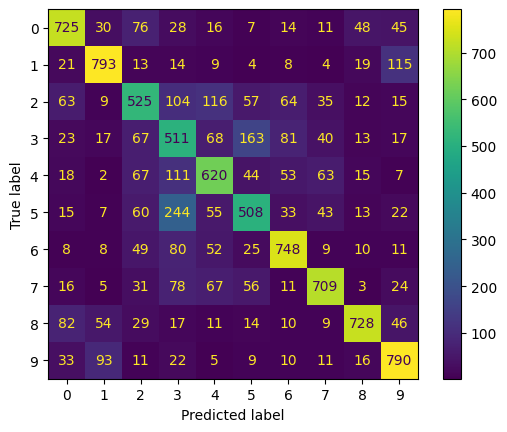

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions,axis=1)
test_true_labels = np.argmax(test_labels,axis =1 )

cm = confusion_matrix(test_true_labels, test_predicted_labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(include_values=True, cmap='viridis',ax=None, xticks_rotation='horizontal')
plt.show()